In [26]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia-340-bucket-1/organizations-10000.csv') # load the data from s3
df.head() #show the top 5 rows

,Index,Organization Id,Name,Website,Country,Description,Founded,Industry,Number of employees
0,1,522816eF8fdBE6d,Mckinney PLC,http://soto.com/,Sri Lanka,Synergized global system engine,1988,Dairy,3930
1,2,70C7FBD7e6Aa3Ea,Cunningham LLC,http://harding-duffy.com/,Namibia,Team-oriented fault-tolerant adapter,2018,Library,7871
2,3,428B397eA2d7290,Ruiz-Walls,http://www.atkins.biz/,Iran,Re-contextualized bifurcated moderator,2003,Hospital / Health Care,3095
3,4,9D234Ae8Cc51C1c,"Parrish, Osborne and Clarke",http://salazar.info/,British Indian Ocean Territory (Chagos Archipe...,Fully-configurable next generation concept,1989,Supermarkets,5422
4,5,6CDCcdE3D0b7b44,"Diaz, Robles and Haley",https://www.brooks-scott.net/,Botswana,Inverse intangible methodology,2013,Nanotechnology,3135


In [ ]:
df.info()

This code shows how many non-null values the dataset contains, since the dataset has 10,000 rows and 10,000 non-null values then this dataset does not have any empty cells or incomplete values. The dataset has 9 total columns - 3 with integer values and 6 with object values. Since there are as many non-null values as there are rows, it is unlikely that there will need to be much data cleaning other than ensuring a consistent format.

In [ ]:
df.isnull().sum()

In [ ]:
df.rename(columns={'Organization Id': 'Unique Identifier'}, inplace=True)
df.info()

I renamed the column "Organization Id" to "Unique Identifier". Since there were no null values, no additional adjustments were made.

In [ ]:
df['Number of employees']

In [ ]:
df.sort_values(by='Founded')

In [ ]:
df[slice(0, 5)]

In [ ]:
df[df['Industry'] == 'Nanotechnology']

I displayed the 'Number of employees' column, sorted values based on their date of foundation, sliced the first five rows, and then filtered the data to only show companies in the 'Nanotechnology' industry.

Text(0, 0.5, 'Employee Count')

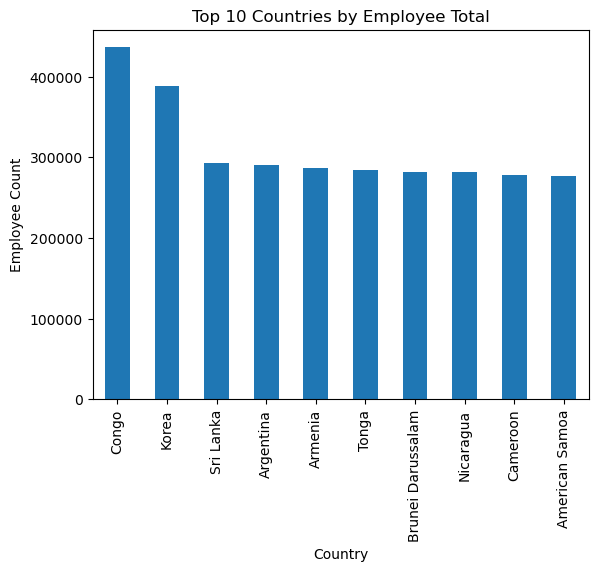

In [63]:
employees_per_country_spread = df.groupby('Country')["Number of employees"].sum()
employees_per_country_spread.nlargest(10).plot.bar()
plt.title("Top 10 Countries by Employee Total")
plt.ylabel("Employee Count")

This chart shows the top ten countries with the most employees. You can tell that Congo and Korea stand out as having the most employees well above the 8 following countries. 

Text(0, 0.5, 'Employee Count')

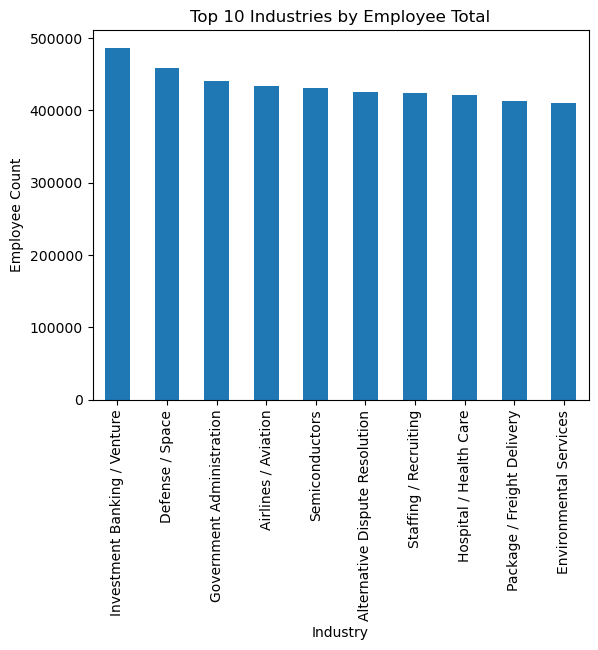

In [64]:
average_employee_count_per_industry = df.groupby('Industry')["Number of employees"].sum()
average_employee_count_per_industry.nlargest(10).plot.bar()
plt.title("Top 10 Industries by Employee Total")
plt.ylabel("Employee Count")

This chart shows the top ten industries with the most employees. You can see that although Investment Banking and Defense industries have the most employees, the number of employees per industry is relatively consistent.

Text(0, 0.5, 'Average Employee Count')

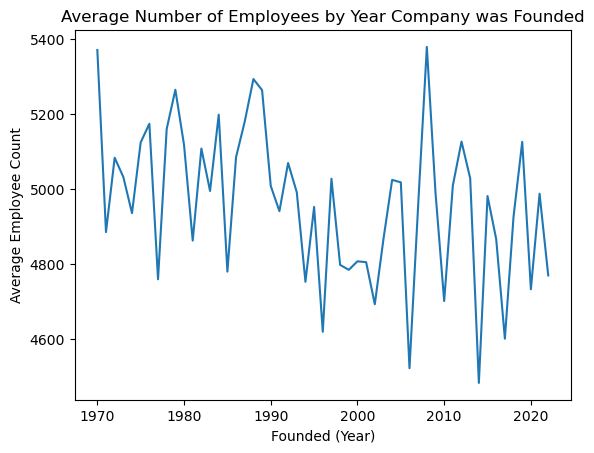

In [59]:
average_employee_count_per_foundation = df.groupby('Founded')["Number of employees"].mean()
average_employee_count_per_foundation.plot.line()
plt.title("Average Number of Employees by Year Company was Founded")
plt.xlabel("Founded (Year)")
plt.ylabel("Average Employee Count")

This chart shows the average number of employees a company has based on the year it was founded. This was done to see if there was a correlation between the longevity of a company and its employee count, but the correlation appears to be marginal.